# Extreme Gradient Boosting

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

# Learning Curves

Generally, a learning curve is a plot that shows time or experience on the x-axis and learning or improvement on the y-axis.

Learning curves are widely used in machine learning for algorithms that learn (optimize their internal parameters) incrementally over time, such as deep learning neural networks.

The metric used to evaluate learning could be maximizing, meaning that better scores (larger numbers) indicate more learning. An example would be classification accuracy.

It is more common to use a score that is minimizing, such as loss or error whereby better scores (smaller numbers) indicate more learning and a value of 0.0 indicates that the training dataset was learned perfectly and no mistakes were made.

During the training of a machine learning model, the current state of the model at each step of the training algorithm can be evaluated. It can be evaluated on the training dataset to give an idea of how well the model is “learning.” It can also be evaluated on a hold-out validation dataset that is not part of the training dataset. Evaluation on the validation dataset gives an idea of how well the model is “generalizing.”

It is common to create dual learning curves for a machine learning model during training on both the training and validation datasets.

The shape and dynamics of a learning curve can be used to diagnose the behavior of a machine learning model, and in turn, perhaps suggest the type of configuration changes that may be made to improve learning and/or performance.

the learning rate, which limits the contribution of each tree added to the ensemble. This can be controlled via the “eta” hyperparameter and defaults to the value of 0.3

Another approach to slowing down learning is to add regularization in the form of reducing the number of samples and features (rows and columns) used to construct each tree in the ensemble.

# Library

In [28]:
# plot learning curve of an xgboost model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

In [18]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import model,scoring
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=50, n_informative=50, n_redundant=0, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [5]:
# define the model
model = XGBClassifier()
# model = XGBClassifier(n_estimators=500)
# model = XGBClassifier(n_estimators=500, eta=0.05)
# model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)

we have done with these models:
Xgboost


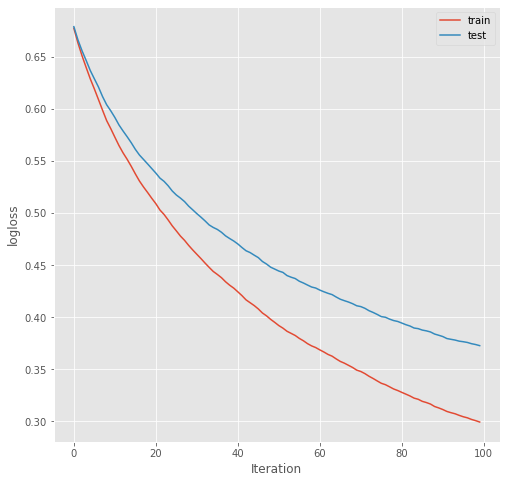

In [17]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(X_train, X_test, y_train, y_test,0.5,['xgb'])

The plot shows learning curves for the train and test dataset where the x-axis is the number of iterations of the algorithm (or the number of trees added to the ensemble) and the y-axis is the logloss of the model. Each line shows the logloss per iteration for a given dataset.

From the learning curves, we can see that the performance of the model on the training dataset (blue line) is better or has lower loss than the performance of the model on the test dataset (orange line), as we might generally expect.

comfusion matrix = 
[[2181  324]
 [ 362 2133]]


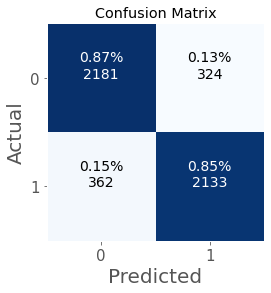


accuracy_score =  0.8628
balanced_accuracy_score =  0.8628

precision score =  0.8681
average precision score =  0.8146
recall score =  0.8549

F1 score =  0.8615
F2 score =  0.8655
F3 score =  0.8668
F_beta score =  0.8655
Matthews Correlation Coefficient score =  0.7257

AUC of Precision-Recall Curve on Testing =  0.9404
Best Threshold for Precision-Recall Curve = 0.478900
F-Score = 0.867
AUC of ROC =  0.9376

Best Threshold for ROC = 0.480900
G-Mean = 0.865
Best Threshold with Youden’s J statistic = 0.478900

Cohens kappa =  0.7256
Gini =  0.8808

Expected Approval Rate =  0.4914
Expected Default Rate =  0.1319

classification_report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2505
           1       0.87      0.85      0.86      2495

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000




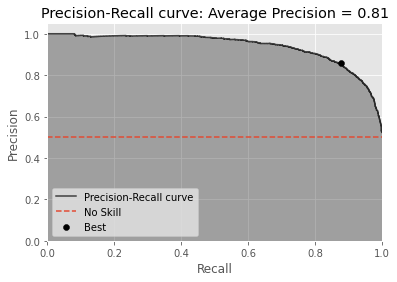

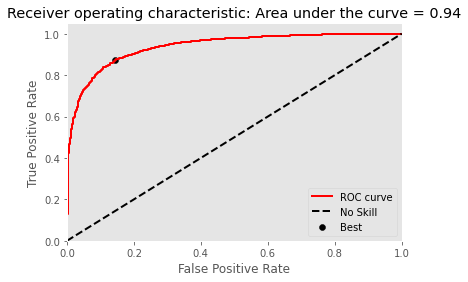


time span=  0:00:01.628002


In [42]:
scoring.print_score(y_test,np.array(pred_model[0]),y_probs=np.array(probs_model[0]),types='classification',labels=["0","1"],time1=time_1[0],time2=time_2[0],X_train=None, y_train=None,X_test=None)